# Deep RL

Name: saeed razavi

Student ID: 98106542

## Environment
Our environemnt is for painting a grayscale image with circles. Our final goal is to paint the image with the least number of circles. The environment is defined as follows:

In [25]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np


class Environment:
    def __init__(self, base: str):
        """
        initializes the environemnt.

        Args:
            base: base image local address
        """
        img = Image.open(base)
        gray_img = img.convert("L")
        self.base_image = gray_img
        self.base_np = np.array(gray_img, dtype=int)
        self.width = img.size[0]
        self.height = img.size[1]
        self.reset()

    def reset(self):
        """
        resets the drawing canvas.
        """
        self.new_image = Image.new('L', size=(
            self.width, self.height), color=0)
        self.canvas = ImageDraw.Draw(self.new_image)
        self.new_np = np.array(self.new_image, dtype=int)
        self.last_loss = self.loss()

    def draw(self, X, Y, R, alpha):
        """
        draws a circle on the drawing canvas.

        Args:
            X: X param of circle center. 0 < X < width
            Y: Y param of circle center. 0 < Y < height
            R: radius of circle. 1 < R < min(width, height) // 2
            alpha: color of the drawn circle. 0 < alpha < 255
        
        Returns:
            reward of the drawn circle on canvas based on loss difference before and after
        """
        self.canvas.ellipse((X - R, Y - R, X + R, Y + R), fill=alpha)
        self.new_np = np.array(self.new_image, dtype=int)
        new_loss = self.loss()
        delta_loss = self.last_loss - new_loss
        self.last_loss = new_loss
        return delta_loss

    def loss(self):
        """
        loss function of drawn canvas comapred to target image

        Returns:
            MSE loss
        """
        return np.mean(np.power(self.delta_image(), 2))

    def delta_image(self):
        """
        difference of drawn canvas and the target image

        Returns:
            difference as a np array
        """
        return self.base_np - self.new_np

    def imshow(self):
        """
        shows the drawn canvas

        Returns:
            drawn canvas plot
        """
        plt.imshow(self.new_image, cmap='gray')

    def baseshow(self):
        """
        shows the target image

        Returns:
            target image plot
        """
        plt.imshow(self.base_image, cmap='gray')

    def deltashow(self):
        """
        shows the difference canvas based on difference of target image and drawn canvas.
        white areas shows where target was white and canvas was black.
        black areas shows where targe was black and canvas was white.
        gray areas shows where colors matched.

        Returns:
            difference canvas plot
        """
        plt.imshow((self.delta_image() + 256) / 2, cmap='gray')


Base Image:


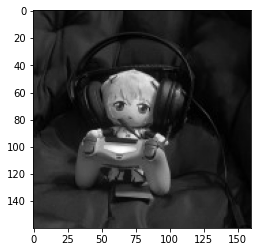

Current Canvas:


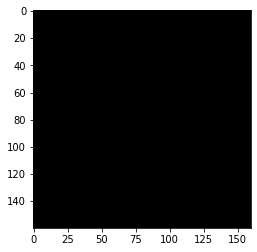

Difference Canvas:


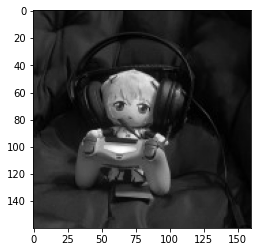

Drawn Circle Reward: 773.455
Current Canvas:


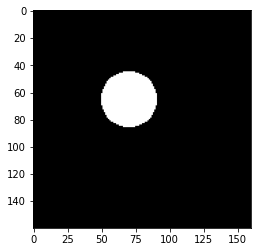

Difference Canvas:


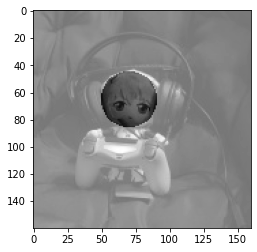

Drawn Circle Reward: 87.922
Current Canvas:


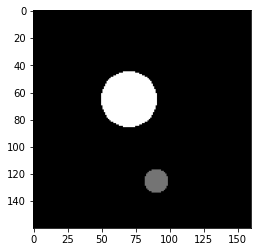

Difference Canvas:


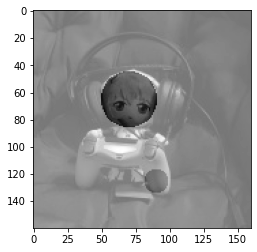

Drawn Circle Reward: 30.750
Current Canvas:


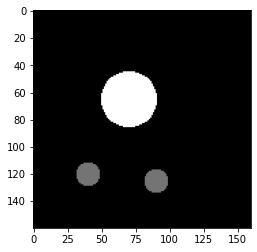

Difference Canvas:


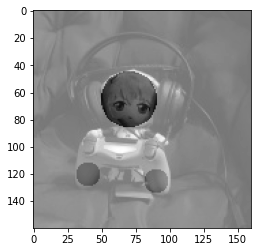

Drawn Circle Reward: -423.534
Current Canvas:


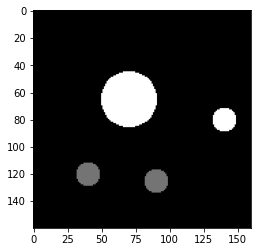

Difference Canvas:


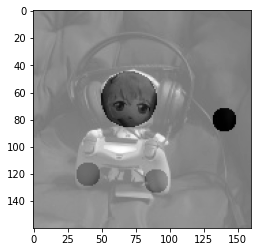

In [29]:
env = Environment('imtest.jpg')
print('Base Image:')
env.baseshow()
plt.show()
print('Current Canvas:')
env.imshow()
plt.show()
print('Difference Canvas:')
env.deltashow()
plt.show()
print(f'Drawn Circle Reward: {env.draw(70, 65, 20, 220):.3f}')
print('Current Canvas:')
env.imshow()
plt.show()
print('Difference Canvas:')
env.deltashow()
plt.show()
print(f'Drawn Circle Reward: {env.draw(90, 125, 8, 100):.3f}')
print('Current Canvas:')
env.imshow()
plt.show()
print('Difference Canvas:')
env.deltashow()
plt.show()
print(f'Drawn Circle Reward: {env.draw(40, 120, 8, 100):.3f}')
print('Current Canvas:')
env.imshow()
plt.show()
print('Difference Canvas:')
env.deltashow()
plt.show()
print(f'Drawn Circle Reward: {env.draw(140, 80, 8, 220):.3f}')
print('Current Canvas:')
env.imshow()
plt.show()
print('Difference Canvas:')
env.deltashow()
plt.show()

## Neural Network
Design an architecture for your neural network to predict actions based on difference canvas. You can read `Agent` class to understand how online and target models work.

Using a convolutional architecture is recommended. 

In [28]:
import torch
from torch import nn
from torch.functional import F
import torchvision
import copy

class Actor(nn.Module):

     def __init__(self, width, height,state_dim=1, action_dim=4):
        super().__init__()
        self.width=width
        self.height=height 
        #-----------------
        # TODO: define your model here

        self.actor  = nn.Sequential(
            nn.Conv2d(in_channels=state_dim, out_channels=32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(16384, 512),
            nn.ReLU(),
            nn.Linear(512, action_dim),
        )
     def forward(self,input):
            return self.actor(input)


class Critic(nn.Module):

     def __init__(self, width, height,state_dim=1, action_dim=4):
        super().__init__()
        self.width=width
        self.height=height 
        #-----------------
        # TODO: define your model here

        self.part1  = nn.Sequential(
            nn.Conv2d(in_channels=state_dim, out_channels=32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(16384, 512),
            nn.ReLU(),
            nn.Linear(512, 1),
        )

        self.part2= nn.Sequential (
            nn.Linear(action_dim,2),
            nn.ReLU(),
            nn.Linear(2,1)
        )
     def forward(self,input1,input2):
            pt1=self.part1(input1)
            pt2=self.part1(input1)
            return pt1+pt2
# class AgentNet(nn.Module):
#     def __init__(self, width, height,state_dim=32, action_dim=4):
#         super().__init__()
#         self.width=width
#         self.height=height 
#         #-----------------
#         # TODO: define your model here

#         self.actor  = nn.Sequential(
#             nn.Conv2d(in_channels=state_dim, out_channels=32, kernel_size=8, stride=4),
#             nn.ReLU(),
#             nn.Conv2d(in_channels=32, out_channels=64, kernel_size=4, stride=2),
#             nn.ReLU(),
#             nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1),
#             nn.ReLU(),
#             nn.Flatten(),
#             nn.Linear(3136, 512),
#             nn.ReLU(),
#             nn.Linear(512, action_dim),
#         )

#         self.critic = nn.Sequential(
#             nn.Conv2d(in_channels=state_dim+action_dim, out_channels=32, kernel_size=8, stride=4),
#             nn.ReLU(),
#             nn.Conv2d(in_channels=32, out_channels=64, kernel_size=4, stride=2),
#             nn.ReLU(),
#             nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1),
#             nn.ReLU(),
#             nn.Flatten(),
#             nn.Linear(3136, 512),
#             nn.ReLU(),
#             nn.Linear(512, 1),
#         )
        
#         #----------------------------------------

#         self.target_actor = copy.deepcopy(self.actor)
#         self.target_critic= copy.deepcopy(self.critic)
#         for p in self.target.parameters():
#             p.requires_grad = False

#     def forward(self, input, model):
#         if model == 'actor':
#             return self.online(input)
#         if( model == 'critic'):
#             return self.critic(input)    


## Agent
This is the recommended agent structure for this environment. You can change it as you please.

You must save your model after training. your model should be saved as `model.pkl` in the same directory as this notebook.

In [27]:
import torch
import random
from collections import deque

device = 'cuda' if torch.cuda.is_available() else 'cpu'

class Agent:
    def __init__(self, width, height,action_dim=4,state_dim=1):
        """
        initializes the agent.

        Args:
            width: base image width
            height: base image height
        """
        self.width = width
        self.height = height
        self.memory = deque(maxlen=20000) # cache size limited by GPU memory
        self.batch_size = 32 # training batch size

        self.exploration_rate = 1 # initial epsilon
        self.exploration_rate_decay = 0.9999975 # epsilon decay rate
        self.exploration_rate_min = 0.1 # minimum epsilon
        self.gamma = 0.9 # reward gamma

        self.curr_step = 0 # initial step
        self.burnin = 5e3 # initial step before training begins
        self.learn_every = 3 # trains every K step
        self.sync_every = 1e3 # sync online and target model every K step
        self.save_every = 2.5e4 # saves model every K step

        self.use_cuda = torch.cuda.is_available()

        # self.net = AgentNet(width, height).float()
        # if self.use_cuda:
        #     self.net = self.net.to(device='cuda')

        # self.actor = self.net.actor(state_dim, action_dim).to(device)   
        self.actor = Actor(state_dim, action_dim).to(device)
        self.actor_target = Actor(state_dim, action_dim).to(device)
        self.actor_target.load_state_dict(self.actor.state_dict())
        self.actor_optimizer = torch.optim.Adam(self.actor.parameters(), lr=0.00025)
        self.actor_loss = torch.nn.SmoothL1Loss()

        self.critic = Critic(state_dim, action_dim).to(device)
        self.critic_target = Critic(state_dim, action_dim).to(device)
        self.critic_target.load_state_dict(self.critic.state_dict())
        self.critic_optimizer = torch.optim.Adam(self.critic.parameters(), lr=0.00025) 
        self.critic_loss = torch.nn.SmoothL1Loss()

        # self.optimizer = torch.optim.Adam(self.net.parameters(), lr=0.00025)
        self.loss_fn = torch.nn.SmoothL1Loss()
        # self.critic_target = self.net((torch.cat([state_dim, action_dim], 1)),'critic').to(device)
 
    def act(self, state):
        """
        predicts agent action by epsilon-greedy policy

        Args:
            state: difference canvas
        
        Returns:
            agent predicted action
        """
        if np.random.rand() < self.exploration_rate:
            X = np.random.randint(self.width)
            Y = np.random.randint(self.height)
            R = np.random.randint(1, min(self.width, self.height)//2)
            alpha = np.random.randint(255)
        else:
            state = torch.FloatTensor(state)
            if self.use_cuda:
                state = state.cuda()
            state = state.unsqueeze(0)
            # TODO: predict action with your model here
            # X = 
            # Y = 
            # R =
            # alpha =
            X ,Y ,R ,alpha = self.actor(state).cpu().data.numpy().flatten()
            #-------------------------------------
            X= int(X) if X>0 else  np.random.randint(self.width)
            Y= int(Y) if Y>0 else  np.random.randint(self.width)
            R =int(R) if R>0 else  np.random.randint(1, min(self.width, self.height)//2)
            alpha = int(alpha) if alpha>0 else  np.random.randint(255)
            #-------------------------------------
        self.exploration_rate *= self.exploration_rate_decay
        self.exploration_rate = max(self.exploration_rate_min, self.exploration_rate)
        self.curr_step += 1
        return X, Y, R, alpha

    def cache(self, state, next_state, reward, action):
        """
        caches state and action info for training

        Args:
            state: drawing canvas
            next_state: drawing canvas after action
            reward: reward for the drawn circle
            action: tuple of X, Y, R, alpha
        """
        state = torch.FloatTensor(state)
        next_state = torch.FloatTensor(next_state)
        reward = torch.FloatTensor([reward])
        action = torch.LongTensor([action])
        if self.use_cuda:
            state = state.cuda()
            next_state = next_state.cuda()
            reward = reward.cuda()
            action = action.cuda()
        self.memory.append((state, next_state, reward, action))

    def recall(self):
        """
        recalls cached state and action info for training

        Returns:
            state: drawing canvas
            next_state: drawing canvas after action
            reward: reward for the drawn circle
            action: tuple of X, Y, R, alpha
        """
        batch = random.sample(self.memory, self.batch_size)
        state, next_state, reward, action = map(torch.stack, zip(*batch))
        return state, next_state, reward.squeeze(), action.squeeze()

    def td_estimate(self, state, next_state, action):
        """
        returns online critic value for the state given action or Q(s, a)

        Args:
            state: drawing canvas
            next_state: drawing canvas after action
            action: tuple of X, Y, R, alpha
        
        Returns:
            critic value with online model
        """
        # TODO: get critic value from online model
        current_Q=self.critic(torch.tensor(state), torch.tensor(action))

        return current_Q
        

    @torch.no_grad()
    def td_target(self, state, next_state, action, reward):
        """
        returns target critic value for the next state or max Q(s', a')

        Args:
            state: drawing canvas
            next_state: drawing canvas after action
            action: tuple of X, Y, R, alpha
            reward: reward for the drawn circle
        
        Returns:
            critic value with target model
        """
        next_Q = self.critic_target(next_state, self.actor_target(next_state))
        # TODO: get critic value from taget model
        return (reward + self.gamma * next_Q).detach().float()

    def update_Q_online(self, td_estimate, td_target):
        """
        updates online model

        Args:
            td_estimate: online critic value for the state
            td_target: target critic value for the next state
        
        Returns:
            loss of estimate vs target
        """
        loss = self.critic_loss(td_estimate, td_target)
        self.critic_optimizer.zero_grad()
        loss.backward()
        self.critic_optimizer.step()
        
        # loss2=self.actor_loss(td_estimate, td_target)
        # self.actor_optimizer.zero_grad()
        # loss2.backward()
        # self.actor_optimizer.step()

        return loss.item()

    def sync_Q_target(self):
        """
        sync online and target model
        """
        self.critic_target.load_state_dict(self.critic.state_dict())
        self.actor_target.load_state_dict(self.actor.state_dict())

    def learn(self):
        """
        recalls random samples and trains online model with the rewards.
        """
        if self.curr_step % self.sync_every == 0:
            self.sync_Q_target()
        if self.curr_step % self.save_every == 0:
            torch.save(self.actor.state_dict() ,  'actor.pkl')
            torch.save(self.critic.state_dict(),   'critic.pkl')
        if self.curr_step < self.burnin:
            return None, None
        if self.curr_step % self.learn_every != 0:
            return None, None
        state, next_state, reward, action = self.recall()
        td_est = self.td_estimate(state, next_state, action)
        td_tgt = self.td_target(state, next_state, action, reward)
        loss = self.update_Q_online(td_est, td_tgt)

## Train

Difference canvas is used as input to the model to decide the next action. The agent should learn to paint the image with the least number of circles.

Base Loss: 3090.513


Loss 20900.840:   0%|          | 0/1000 [00:00<?, ?it/s]

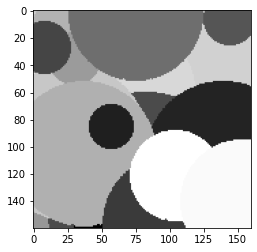

Loss 22532.870:   0%|          | 5/1000 [00:03<12:32,  1.32it/s]<ipython-input-27-e319709697cf>:140: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  current_Q=self.critic(torch.tensor(state), torch.tensor(action))
Loss 14156.293:   1%|          | 10/1000 [00:33<1:11:24,  4.33s/it]

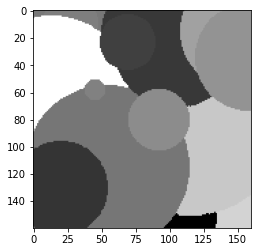

Loss 9870.382:   2%|▏         | 20/1000 [01:22<1:20:23,  4.92s/it]

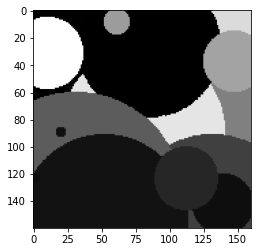

Loss 9312.504:   3%|▎         | 30/1000 [02:12<1:19:49,  4.94s/it] 

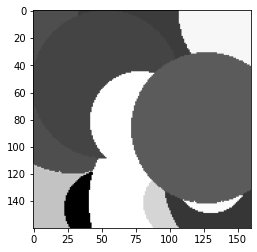

Loss 17007.866:   4%|▍         | 40/1000 [03:02<1:19:01,  4.94s/it]

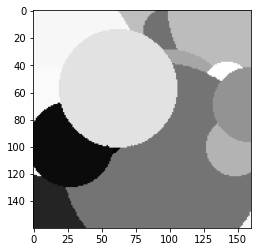

Loss 7024.834:   5%|▌         | 50/1000 [03:52<1:19:21,  5.01s/it]

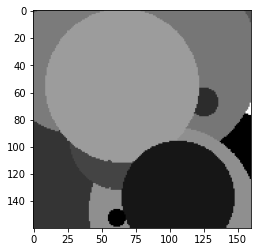

Loss 8820.724:   6%|▌         | 60/1000 [04:43<1:19:07,  5.05s/it] 

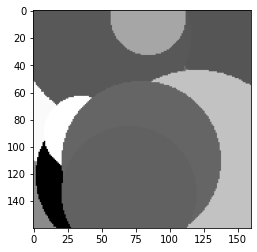

Loss 15049.382:   7%|▋         | 70/1000 [05:33<1:17:22,  4.99s/it]

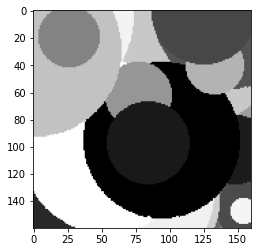

Loss 4571.200:   8%|▊         | 80/1000 [06:23<1:17:35,  5.06s/it] 

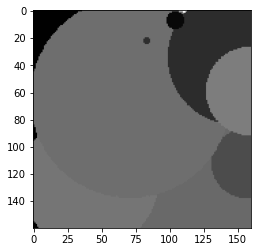

Loss 7671.255:   9%|▉         | 90/1000 [07:14<1:17:01,  5.08s/it]

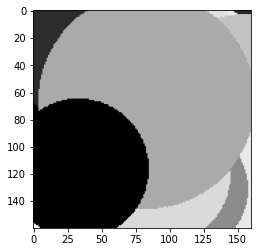

Loss 31354.824:  10%|█         | 100/1000 [08:05<1:16:44,  5.12s/it]

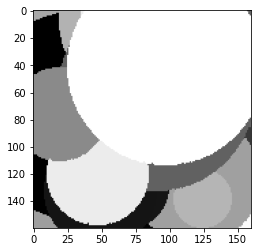

Loss 15534.860:  11%|█         | 110/1000 [08:56<1:15:19,  5.08s/it]

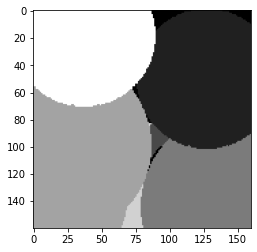

Loss 20199.466:  12%|█▏        | 120/1000 [09:47<1:14:16,  5.06s/it]

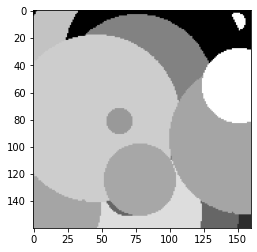

Loss 21824.021:  13%|█▎        | 130/1000 [10:40<1:15:04,  5.18s/it]

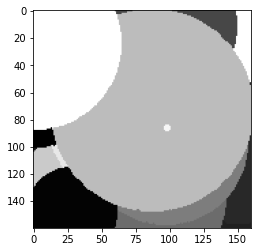

Loss 3365.182:  14%|█▍        | 140/1000 [11:31<1:13:28,  5.13s/it] 

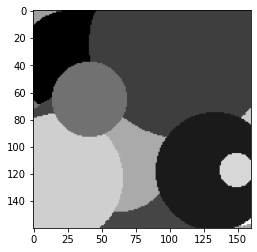

Loss 9971.096:  15%|█▌        | 150/1000 [12:23<1:13:21,  5.18s/it]

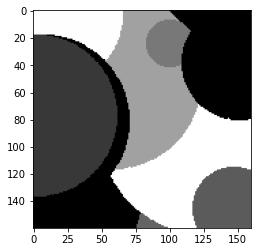

Loss 14275.314:  16%|█▌        | 160/1000 [13:15<1:12:37,  5.19s/it]

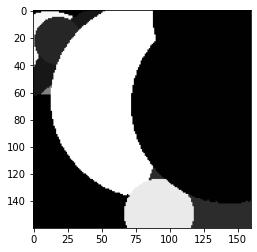

Loss 16478.516:  17%|█▋        | 170/1000 [14:07<1:11:35,  5.17s/it]

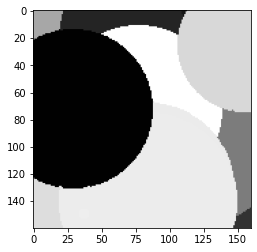

Loss 29736.519:  18%|█▊        | 180/1000 [14:59<1:10:43,  5.17s/it]

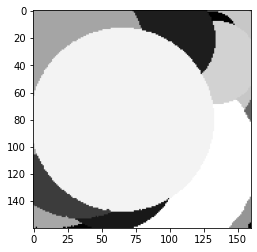

Loss 10444.996:  19%|█▉        | 190/1000 [15:51<1:10:41,  5.24s/it]

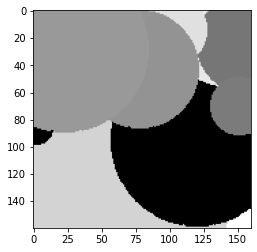

Loss 5149.415:  20%|██        | 200/1000 [16:44<1:12:06,  5.41s/it]

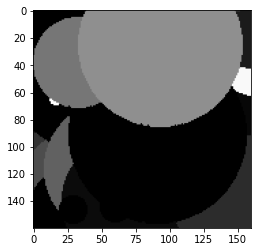

Loss 7674.775:  21%|██        | 210/1000 [17:37<1:08:50,  5.23s/it]

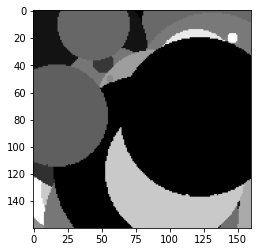

Loss 16358.934:  22%|██▏       | 220/1000 [18:29<1:08:08,  5.24s/it]

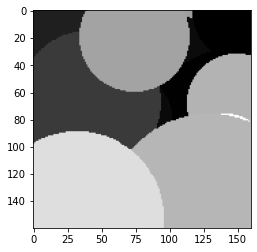

Loss 22915.699:  23%|██▎       | 230/1000 [19:22<1:07:32,  5.26s/it]

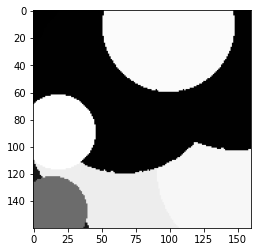

Loss 4688.142:  24%|██▍       | 240/1000 [20:15<1:06:29,  5.25s/it]

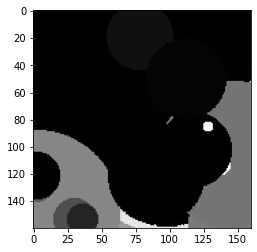

Loss 5278.400:  25%|██▌       | 250/1000 [21:08<1:07:08,  5.37s/it] 

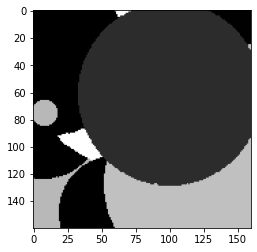

Loss 4001.704:  26%|██▌       | 260/1000 [22:01<1:05:01,  5.27s/it] 

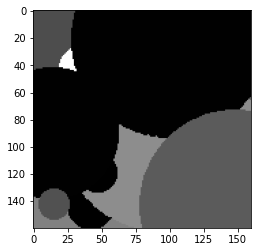

Loss 7173.927:  27%|██▋       | 270/1000 [22:55<1:06:28,  5.46s/it]

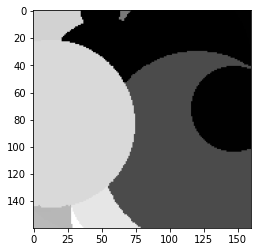

Loss 12576.697:  28%|██▊       | 280/1000 [23:50<1:05:20,  5.45s/it]

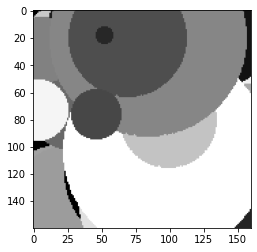

Loss 4808.599:  29%|██▉       | 290/1000 [24:50<1:07:22,  5.69s/it] 

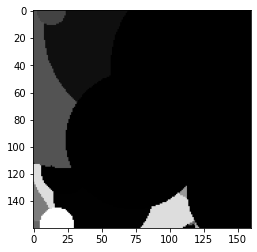

Loss 13801.673:  30%|███       | 300/1000 [25:44<1:02:56,  5.40s/it]

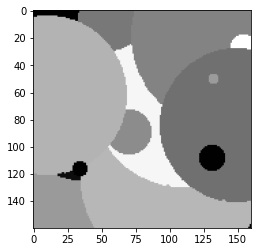

Loss 22974.898:  31%|███       | 310/1000 [26:38<1:02:24,  5.43s/it]

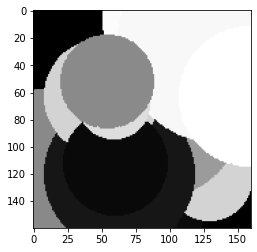

Loss 14912.088:  32%|███▏      | 320/1000 [27:32<1:00:16,  5.32s/it]

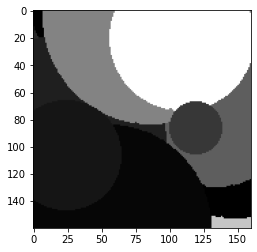

Loss 7257.062:  33%|███▎      | 330/1000 [28:26<1:00:10,  5.39s/it]

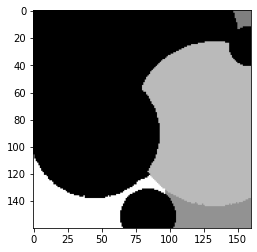

Loss 3921.389:  34%|███▍      | 340/1000 [29:20<59:44,  5.43s/it] 

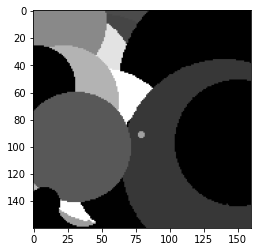

Loss 8557.755:  35%|███▌      | 350/1000 [30:14<59:04,  5.45s/it] 

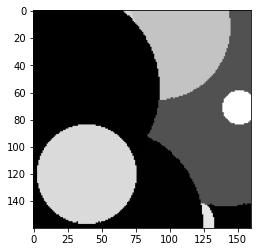

Loss 9991.429:  36%|███▌      | 360/1000 [31:09<57:17,  5.37s/it]

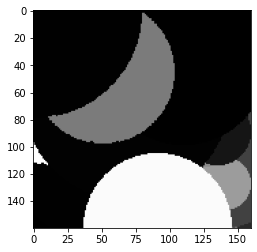

Loss 9720.659:  37%|███▋      | 370/1000 [32:03<56:56,  5.42s/it] 

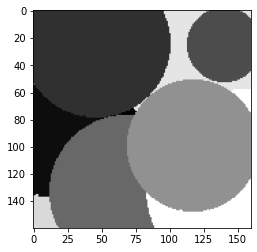

Loss 17112.093:  38%|███▊      | 380/1000 [32:57<55:34,  5.38s/it]

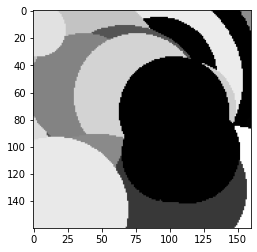

Loss 4362.381:  39%|███▉      | 390/1000 [33:51<55:11,  5.43s/it]

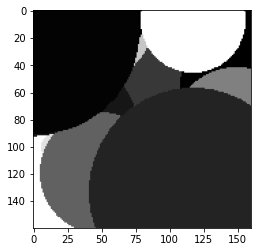

Loss 9486.124:  40%|████      | 400/1000 [34:46<54:23,  5.44s/it]

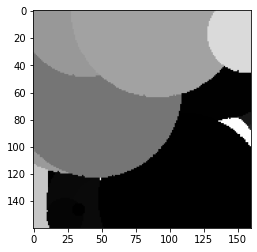

Loss 7762.084:  41%|████      | 410/1000 [35:40<53:30,  5.44s/it] 

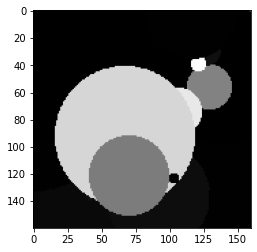

Loss 7628.732:  42%|████▏     | 420/1000 [36:35<52:01,  5.38s/it] 

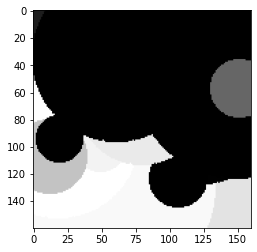

Loss 8741.869:  43%|████▎     | 430/1000 [37:29<51:45,  5.45s/it]

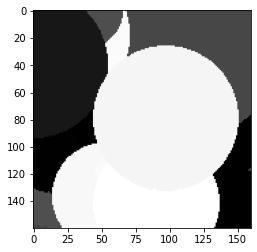

Loss 12795.522:  44%|████▍     | 440/1000 [38:24<50:18,  5.39s/it]

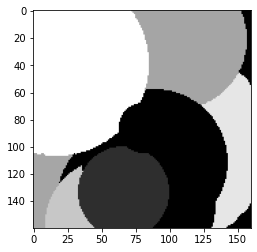

Loss 10953.053:  45%|████▌     | 450/1000 [39:18<50:24,  5.50s/it]

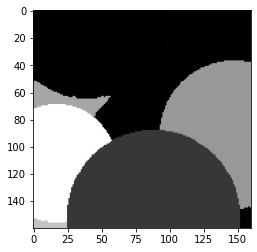

Loss 10092.563:  46%|████▌     | 460/1000 [40:13<48:36,  5.40s/it]

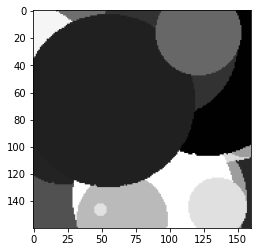

Loss 4517.289:  47%|████▋     | 470/1000 [41:08<48:08,  5.45s/it]

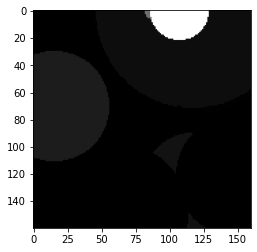

Loss 16190.933:  48%|████▊     | 480/1000 [42:03<47:45,  5.51s/it]

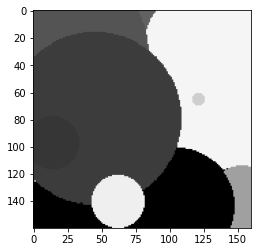

Loss 7552.323:  49%|████▉     | 490/1000 [42:59<47:37,  5.60s/it] 

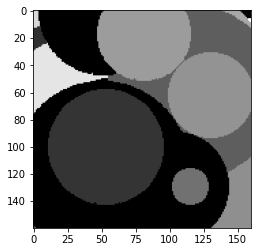

Loss 10007.747:  50%|█████     | 500/1000 [43:54<46:07,  5.53s/it]

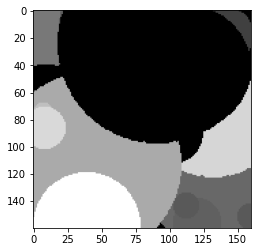

Loss 7143.984:  51%|█████     | 510/1000 [44:49<44:07,  5.40s/it]

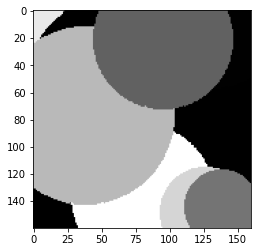

Loss 4478.389:  52%|█████▏    | 520/1000 [45:43<43:33,  5.44s/it]

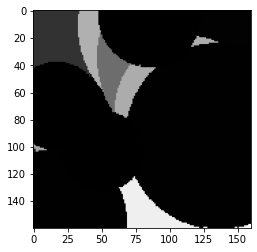

Loss 6846.343:  53%|█████▎    | 530/1000 [46:38<42:51,  5.47s/it] 

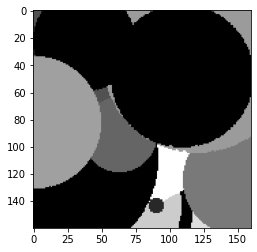

Loss 16490.629:  54%|█████▍    | 540/1000 [47:34<41:55,  5.47s/it]

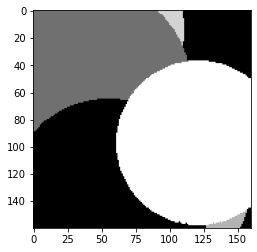

Loss 5505.585:  55%|█████▌    | 550/1000 [48:29<41:45,  5.57s/it] 

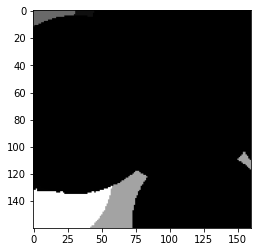

Loss 3336.910:  56%|█████▌    | 560/1000 [49:24<39:59,  5.45s/it]

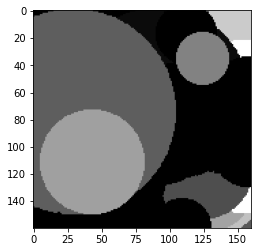

Loss 6703.531:  57%|█████▋    | 570/1000 [50:19<39:25,  5.50s/it]

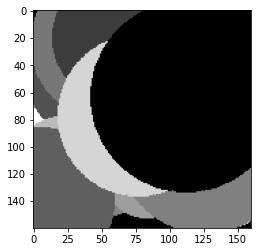

Loss 19213.205:  58%|█████▊    | 580/1000 [51:14<38:12,  5.46s/it]

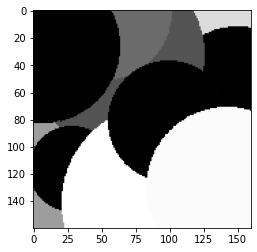

Loss 4061.863:  59%|█████▉    | 590/1000 [52:09<37:33,  5.50s/it]

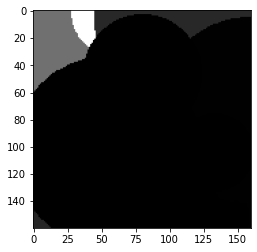

Loss 11973.656:  60%|██████    | 600/1000 [53:05<37:17,  5.59s/it]

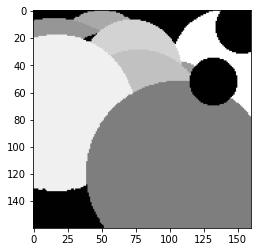

Loss 9864.543:  61%|██████    | 610/1000 [54:01<36:16,  5.58s/it] 

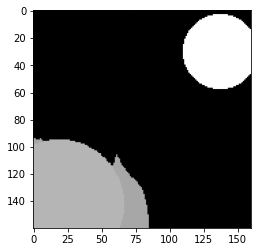

Loss 13083.996:  62%|██████▏   | 620/1000 [54:56<35:07,  5.55s/it]

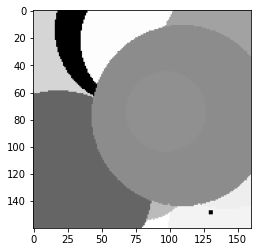

Loss 5973.721:  63%|██████▎   | 630/1000 [55:51<33:59,  5.51s/it] 

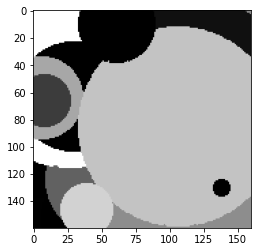

Loss 9532.428:  64%|██████▍   | 640/1000 [56:47<33:15,  5.54s/it]

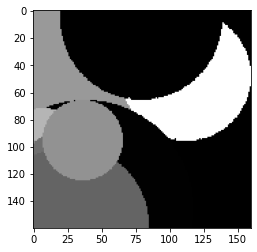

Loss 6348.064:  65%|██████▌   | 650/1000 [57:42<32:34,  5.58s/it] 

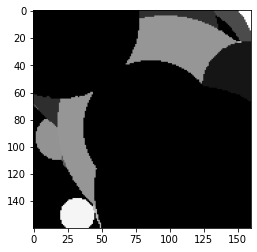

Loss 3555.965:  66%|██████▌   | 660/1000 [58:37<30:59,  5.47s/it]

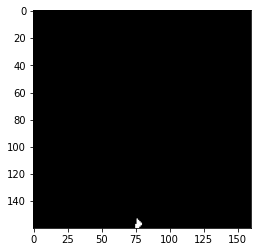

Loss 5760.173:  67%|██████▋   | 670/1000 [59:32<30:08,  5.48s/it]

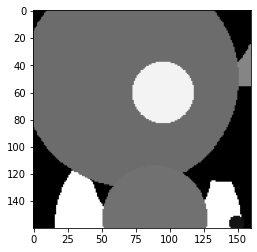

Loss 6231.009:  68%|██████▊   | 680/1000 [1:00:27<29:11,  5.47s/it]

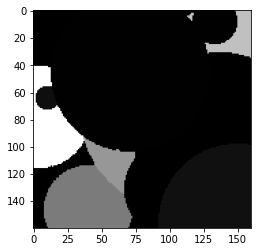

Loss 8049.710:  69%|██████▉   | 690/1000 [1:01:22<28:29,  5.51s/it]

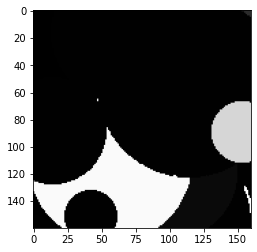

Loss 8401.531:  70%|███████   | 700/1000 [1:02:18<27:52,  5.57s/it]

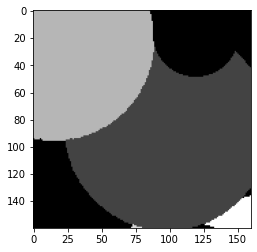

Loss 11902.175:  71%|███████   | 710/1000 [1:03:13<26:42,  5.53s/it]

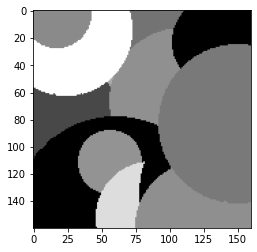

Loss 6825.903:  72%|███████▏  | 720/1000 [1:04:09<25:39,  5.50s/it] 

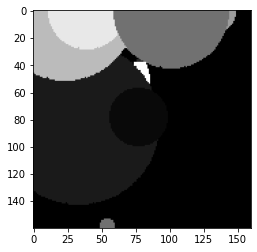

Loss 3592.943:  73%|███████▎  | 730/1000 [1:05:04<24:47,  5.51s/it] 

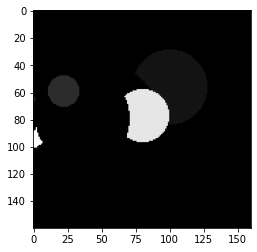

Loss 16766.324:  74%|███████▍  | 740/1000 [1:05:59<23:56,  5.53s/it]

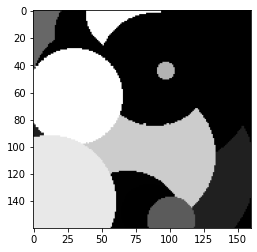

Loss 11138.617:  75%|███████▌  | 750/1000 [1:06:55<23:11,  5.56s/it]

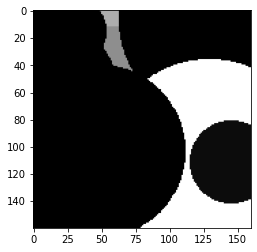

Loss 4629.990:  76%|███████▌  | 760/1000 [1:07:50<22:22,  5.59s/it]

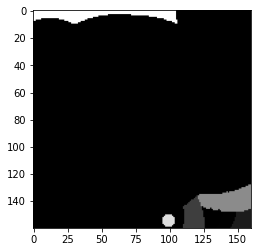

Loss 5866.227:  77%|███████▋  | 770/1000 [1:08:47<21:26,  5.59s/it]

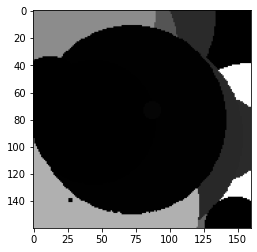

Loss 9587.381:  78%|███████▊  | 780/1000 [1:09:42<20:23,  5.56s/it]

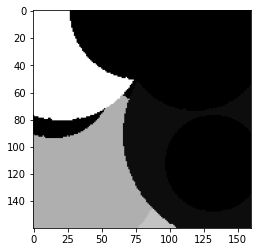

Loss 7017.508:  79%|███████▉  | 790/1000 [1:10:38<19:22,  5.54s/it]

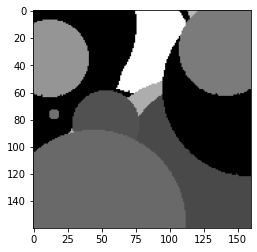

Loss 3216.160:  80%|████████  | 800/1000 [1:11:33<18:33,  5.57s/it]

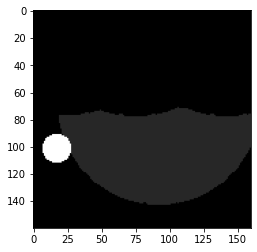

Loss 4940.509:  81%|████████  | 810/1000 [1:12:29<17:31,  5.54s/it] 

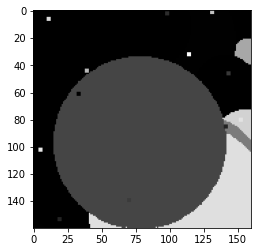

Loss 9091.541:  82%|████████▏ | 820/1000 [1:13:24<16:30,  5.50s/it]

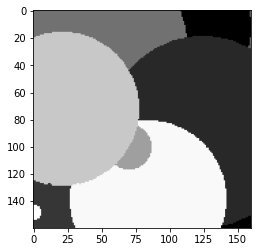

Loss 2864.693:  83%|████████▎ | 830/1000 [1:14:20<15:37,  5.52s/it] 

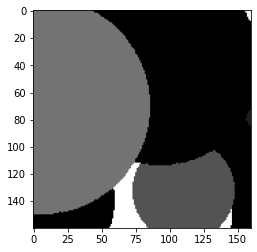

Loss 7478.169:  84%|████████▍ | 840/1000 [1:15:15<14:40,  5.50s/it] 

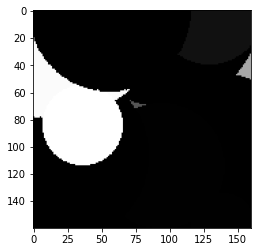

Loss 6889.951:  85%|████████▌ | 850/1000 [1:16:10<13:58,  5.59s/it] 

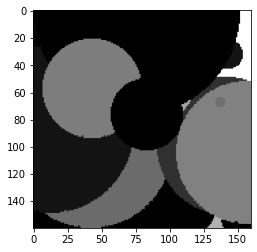

Loss 3495.340:  86%|████████▌ | 860/1000 [1:17:06<12:58,  5.56s/it]

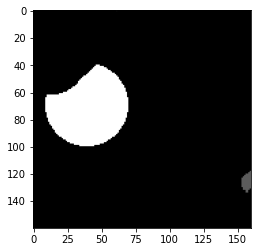

Loss 4490.697:  87%|████████▋ | 870/1000 [1:18:02<12:01,  5.55s/it] 

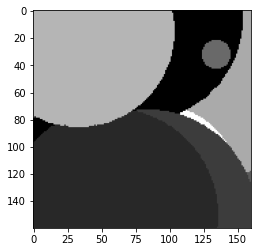

Loss 3550.104:  88%|████████▊ | 880/1000 [1:18:57<11:06,  5.56s/it]

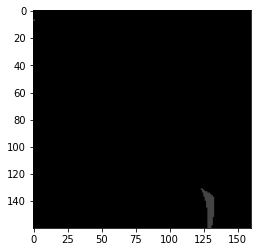

Loss 16977.852:  89%|████████▉ | 890/1000 [1:19:53<10:06,  5.51s/it]

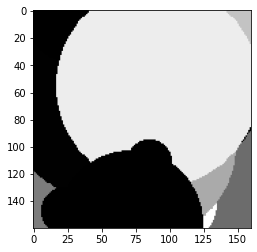

Loss 4480.508:  90%|█████████ | 900/1000 [1:20:48<09:18,  5.59s/it]

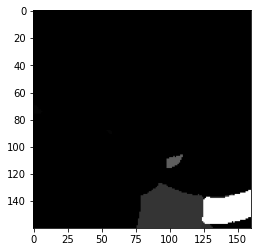

Loss 12447.730:  91%|█████████ | 910/1000 [1:21:44<08:17,  5.52s/it]

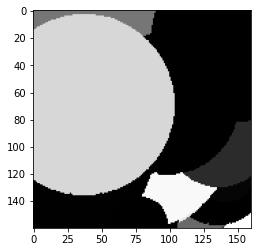

Loss 18534.039:  92%|█████████▏| 920/1000 [1:22:40<07:21,  5.52s/it]

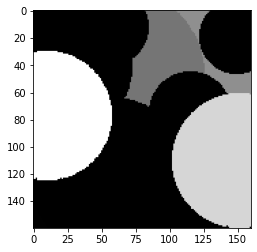

Loss 12444.739:  93%|█████████▎| 930/1000 [1:23:35<06:28,  5.54s/it]

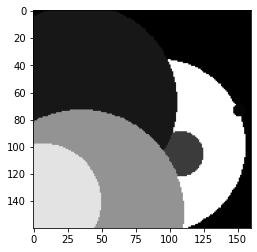

Loss 3520.154:  94%|█████████▍| 940/1000 [1:24:31<05:32,  5.54s/it] 

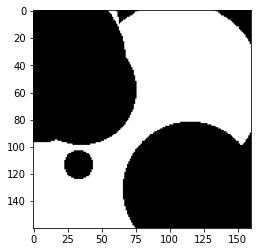

Loss 5557.302:  95%|█████████▌| 950/1000 [1:25:27<04:41,  5.62s/it]

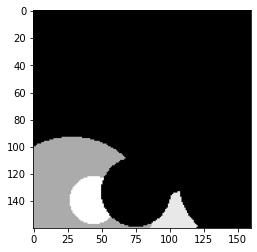

Loss 15480.369:  96%|█████████▌| 960/1000 [1:26:22<03:42,  5.57s/it]

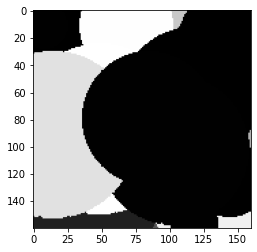

Loss 4769.343:  97%|█████████▋| 966/1000 [1:26:50<03:08,  5.56s/it]

In [ ]:
from tqdm import tqdm

episodes = 1000
moves = 1000
print(f'Base Loss: {env.loss():.3f}')
agent = Agent(env.width, env.height)
losses = []
pbar = tqdm(range(episodes))
for e in pbar:
    # torch.cuda.empty_cache() if you run into CUDA_OUT_OF_MEMORY
    state = env.reset()
    for m in range(1, moves+1):
        curr_state = env.delta_image().reshape(1, env.width, env.height)
        action = agent.act(curr_state)
        # print(action)
        reward = env.draw(*action)
        next_state = env.delta_image().reshape(1, env.width, env.height)
        agent.cache(curr_state, next_state, reward, action)
        agent.learn()
    pbar.set_description(f'Loss {env.loss():.3f}')
    losses.append(env.loss())
    if e % 10 == 0:
        env.imshow()
        plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import shutil
shutil.copy("/content/critic.pkl", "/content/gdrive/file.doc")

## Test and Visualize

First visualize the loss in the training process. Then load your saved model and test it on the environment.

You must submit your trained model with your notebook which is saved as `model.pkl`. if your model is large, you can upload it to Google Drive and share it with me.

In [ ]:
plt.title('Loss')
plt.plot(losses)
plt.show()

In [6]:
state = env.reset()
agent.actor.model.load_state_dict(torch.load('/content/actor.pkl')) 
agent.critic.model.load_state_dict(torch.load('/content/critic.pkl')) 
agent.actor.eval()
agent.critic.eval()
for m in range(1, moves+1):
    curr_state = env.delta_image().reshape(1, env.width, env.height)
    print(env.height,env.width)
    agent.exploration_rate = 0
    action = agent.act(curr_state)
    reward = env.draw(*action)
    next_state = env.delta_image().reshape(1, env.width, env.height)
print(f'Final Loss: {env.loss()}')
print('Drawn Canvas:')
env.imshow()
plt.show()
print('Target Image:')
env.baseshow()
plt.show()
print('Difference Canvas:')
env.deltashow()
plt.show()


160 160


RuntimeError: ignored

## Useful Links
[Learning to Paint With Model-based Deep Reinforcement Learning](https://arxiv.org/abs/1903.04411)

[Understanding Actor Critic Methods and A2C](https://towardsdatascience.com/understanding-actor-critic-methods-931b97b6df3f)

[RL introduction: simple actor-critic for continuous actions](https://medium.com/@asteinbach/rl-introduction-simple-actor-critic-for-continuous-actions-4e22afb712)